# So this is the second notebook of the project. I'll be training the for multiple iterations and getting rid of any errors that would have caused my model to underperform.

In [1]:
import pickle
import numpy as np
import os

import matplotlib.pyplot as plt

In [2]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
images = []
labels = []

In [4]:
data_path = ".\\dataset\\cifar-10-batches-py\\"

In [5]:
for i in range(1, 6):
    batch = unpickle(os.path.join(data_path, f"data_batch_{i}"))
    images.append(batch[b'data'])
    labels.append(batch[b'labels'])

In [6]:
train_images = np.vstack(images).reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
print(train_images.shape)
print(len(labels[1]))

(50000, 32, 32, 3)
10000


In [7]:
the_label = np.hstack(labels).reshape(50000, 1)
print(the_label.shape)

(50000, 1)


In [8]:
test_batch = unpickle(os.path.join(data_path, f"test_batch"))
test_image = test_batch[b'data']
test_label = test_batch[b'labels']
test = test_image.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

In [9]:
image_indice = 55

In [10]:
the_image = train_images[image_indice]
the_image = the_image / 255. #trying with normalization
the_image = the_image[:, :, 0]
the_image.shape

(32, 32)

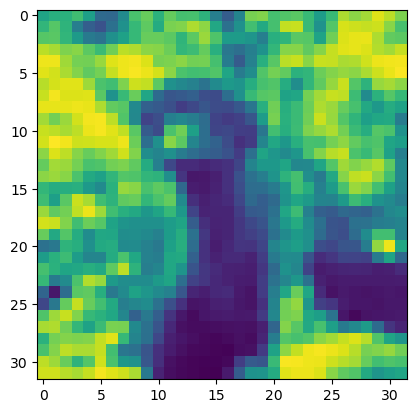

In [11]:
plt.imshow(the_image)
plt.show()

In [12]:
convs1 = np.array(
    [
        [
            [[0.00328364, 0.00046651, 0.00239101],
             [0.0031846,  0.00522945, 0.00504424],
             [0.00656692, 0.00797387, 0.00094572]]
        ],
        [
            [[0.00797592, 0.00631291, 0.0033623],
             [0.00250088, 0.00891176, 0.00581687],
             [0.00331829, 0.00605359, 0.00339134]]
        ],
    ])

convs2 = np.array(
    [
        [
            [[0.00895433, 0.00077189, 0.00134878],
             [0.0024303,  0.00128332, 0.00385131],
             [0.00030218, 0.00822385, 0.0041281 ]],
            [[0.00330197, 0.00191346, 0.00780884],
             [0.00504102, 0.00311831, 0.00084845],
             [0.0042936,  0.0004314,  0.00322003]]
        ],
        [
            [[0.00611116, 0.00969479, 0.00433376],
             [0.00497096, 0.00378853, 0.00957198],
             [0.00069666, 0.00522063, 0.00165166]],
            [[0.00820643, 0.00017181, 0.00121214],
             [0.00166301, 0.00039936, 0.00269654],
             [0.00391191, 0.00306065, 0.00771255]]
        ],
        [
            [[0.00045499, 0.00068764, 0.00229433],
             [0.00027335, 0.00095961, 0.00598458],
             [0.00600151, 0.00034938, 0.00494806]],
            [[0.00858401, 0.0092831, 0.00198257],
             [0.00936511, 0.00155508, 0.00791489],
             [0.00046979, 0.00483815, 0.0068774 ]]
        ],
        [
            [[0.00338009, 0.00940353, 0.00900636],
             [0.00713607, 0.00445887, 0.00500987],
             [0.00164991, 0.00979389, 0.00952612]],
            [[0.00379532, 0.00633353, 0.00105769],
             [0.00736161, 0.00213996, 0.0033809],
             [0.00740902, 0.00608547, 0.00291607]]
        ]
    ]
)
print(convs1.shape)
print(convs2.shape)

(2, 1, 3, 3)
(4, 2, 3, 3)


In [13]:
bias1 = np.array([0., 0.])
bias2 = np.array([0., 0., 0., 0.])

print(bias1.shape)
print(bias2.shape)

(2,)
(4,)


In [14]:
the_image = the_image.reshape(1, 32, 32)
print(the_image.shape)

(1, 32, 32)


In [15]:
feature_map = np.zeros((2, 30, 30))
# the shape is 30,30 because the new feature map's shape will be 30,30

In [16]:
def relu(z):
    return np.maximum(0, z)

In [17]:
max_pool = np.ones((2, 15, 15))

In [18]:
feature_map_ii = np.zeros((4, 12, 12))

In [19]:
def relu_again(z):
    return np.maximum(0, z)

In [20]:
max_pool_ii = np.ones((4, 6, 6))

In [21]:
def diff_relu(z):
    return z > 0

In [22]:
# w1 = np.random.rand(50, 144)*0.01
# b1 = np.zeros((50, 1))
# w2 = np.random.rand(50, 10)*0.01
# b2 = np.zeros((10, 1))


#trying different initialization method
w1 = np.random.rand(50, 144)*np.sqrt(2/(144 + 50))
b1 = np.zeros((50, 1))
w2 = np.random.rand(50, 10)*np.sqrt(2/(50 + 10))
b2 = np.zeros((10, 1))

In [23]:
# def softmax(z):
#     probs = np.exp(z) / sum(np.exp(z))
#     return probs


# stable version of the softmax function

def softmax(x):
    shifted = x - np.max(x, axis=0, keepdims=True)
    exp_x = np.exp(shifted)
    return exp_x / np.sum(exp_x, axis=0, keepdims=True)

In [24]:
def forward(w1, b1, w2, b2, data):
    z1 = np.dot(w1, data) + b1
    a1 = relu(z1)
    z2 = np.dot(w2.T, a1) + b2
    a2 = softmax(z2)
    return a2, z1, a1, z2

In [25]:
def the_value(label):
    labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    return labels[label]

In [26]:
total_classes = 10

hot_encoded_arr = np.zeros((total_classes, 1))
hot_encoded_arr[the_label[image_indice][0]] = 1  # put the corresponding value in the hot_encoded_arr as 1

In [27]:
print(hot_encoded_arr)

[[0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [28]:
def max_pool_backward(dp2, relued_again):
    d_relued_again = np.zeros_like(relued_again)
    #for each maximum number, find its position and assign the particular gradient to it!
    for k in range(4):
        a = 0
        for i in range(0, 12, 2):
            b = 0
            for j in range(0, 12, 2):
                #now we get the indice of the maximum element from the given filter inspection
                the_max = max(relued_again[k][i][j], relued_again[k][i][j+1], relued_again[k][i+1][j], relued_again[k][i+1][j+1])
                #fuck it. I just can't find the function to find the index of the maximum array or my brain isn't working rn, so m gonna use if here
                if the_max == relued_again[k][i][j]:
                    i_is = i
                    j_is = j
                elif the_max == relued_again[k][i][j+1]:
                    i_is = i
                    j_is = j+1
                elif the_max == relued_again[k][i+1][j]:
                    i_is = i+1
                    j_is = j
                else:
                    i_is = i+1
                    j_is = j+1
                d_relued_again[k][i_is][j_is] = dp2[k][a][b] #put gradient in the position at the exact position of the maximum element
                b += 1
            a += 1
    return d_relued_again

In [29]:
def max_pool_backward1(dp, relued):
    d_relued = np.zeros_like(relued)
    #for each maximum number, find its position and assign the particular gradient to it!
    for k in range(2):
        a = 0
        for i in range(0, 15, 2):
            b = 0
            for j in range(0, 15, 2):
                #now we get the indice of the maximum element from the given filter inspection
                the_max = max(relued[k][i][j], relued[k][i][j+1], relued[k][i+1][j], relued[k][i+1][j+1])
                if the_max == relued[k][i][j]:
                    i_is = i
                    j_is = j
                elif the_max == relued[k][i][j+1]:
                    i_is = i
                    j_is = j+1
                elif the_max == relued[k][i+1][j]:
                    i_is = i+1
                    j_is = j
                else:
                    i_is = i+1
                    j_is = j+1
                d_relued[k][i_is][j_is] = dp[k][a][b] #put gradient in the position at the exact position of the maximum element
                b += 1
            a += 1
    return d_relued

In [30]:
#for layer 1
def ahead(w1, b1, w2, b2, convs1, bias1, convs2, bias2):
    for k in range(2):
        for l in range(1):
            for i in range(30):
                for j in range(30):
                    feature_map[k][i][j] = (the_image[l][i][j]*convs1[k][l][0][0] + the_image[l][i][j+1]*convs1[k][l][0][1] + the_image[l][i][j+2]*convs1[k][l][0][2]) + (the_image[l][i+1][j]*convs1[k][l][1][0] + the_image[l][i+1][j+1]*convs1[k][l][1][1] + the_image[l][i+1][j+2]*convs1[k][l][1][2]) + (the_image[l][i+2][j]*convs1[k][l][2][0] + the_image[l][i+2][j+1]*convs1[k][l][2][1] + the_image[l][i+2][j+2]*convs1[k][l][2][2]) + bias1[k]
    
    relued = relu(feature_map)
    
    
    for k in range(2):
        a = 0
        for i in range(0, 30, 2):
            b = 0
            for j in range(0, 30, 2):
                max_pool[k][a][b] = max(relued[k][i][j], relued[k][i][j+1], relued[k][i+1][j], relued[k][i+1][j+1])
                b += 1
            a += 1
    
    #for layer 2        
    for k in range(4):
        for l in range(1):
            for i in range(12):
                for j in range(12):
                    feature_map_ii[k][i][j] = (max_pool[l][i][j]*convs2[k][l][0][0] + max_pool[l][i][j+1]*convs2[k][l][0][1] + max_pool[l][i][j+2]*convs2[k][l][0][2] + max_pool[l][i+1][j]*convs2[k][l][1][0] + max_pool[l][i+1][j+1]*convs2[k][l][1][1] + max_pool[l][i+1][j+2]*convs2[k][l][1][2] + max_pool[l][i+2][j]*convs2[k][l][2][0] + max_pool[l][i+2][j+1]*convs2[k][l][2][1] + max_pool[l][i+2][j+2]*convs2[k][l][2][2]) + (max_pool[l+1][i][j]*convs2[k][l+1][0][0] + max_pool[l+1][i][j+1]*convs2[k][l+1][0][1] +  max_pool[l+1][i][j+2]*convs2[k][l+1][0][2] + max_pool[l+1][i+1][j]*convs2[k][l+1][1][0] + max_pool[l+1][i+1][j+1]*convs2[k][l+1][1][1] + max_pool[l+1][i+1][j+2]*convs2[k][l+1][1][2] + max_pool[l+1][i+2][j]*convs2[k][l+1][2][0] + max_pool[l+1][i+2][j+1]*convs2[k][l+1][2][1] + max_pool[l+1][i+2][j+2]*convs2[k][l+1][2][2]) + bias2[k]
    
    relued_again = relu(feature_map_ii)
    
    for k in range(4):
        a = 0
        for i in range(0, 12, 2):
            b = 0
            for j in range(0, 12, 2):
                max_pool_ii[k][a][b] = max(relued_again[k][i][j], relued_again[k][i][j+1], relued_again[k][i+1][j], relued_again[k][i+1][j+1])
                b += 1
            a += 1
    
    
    #NN layer
    flattened = max_pool_ii.flatten()
    flattened = flattened.reshape(144, 1)
    
    the_val, z1, a1, z2 = forward(w1, b1, w2, b2, flattened)

    prediction_num = np.argmax(the_val, 0)
    a = prediction_num[0]

    predicted_num = np.argmax(the_val, 0)
    predicted_int = predicted_num[0]
    prediction = the_value(predicted_int)

    dz2 = hot_encoded_arr - the_val
    num_data = 1 #this might be causing an issue in our model!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

    dw2 = 1/num_data * dz2.dot(a1.T)
    db2 = 1/num_data * np.sum(dz2)

    dz1 = w2.dot(dz2)*diff_relu(z1)

    dw1 = 1/num_data * dz1.dot(flattened.T)
    db1 = 1/num_data * np.sum(dz1)

    #CNN layer
    df = dw1.T.dot(dz1)

    dp2 = df.reshape((4, 6, 6))

    d_relued_again = max_pool_backward(dp2, relued_again)

    diff_relu(d_relued_again)

    new_d_relued_again = np.pad(d_relued_again, ((0, 0), (0, 1), (0, 1)), mode='constant', constant_values=0)

    d_filter = np.zeros((4, 2, 3, 3))

    for i in range(4): #denotes the number of filters
        for j in range(2): #denotes the depth of image that we're convolving over
            for k in range(3): #the number of times the strides are taken along the vertical direction
                for l in range(3): #the number of times the strides are taken along the horizontal direction
                    addition = 0 #the gradient to be added to the image
                    for m in range(13):
                        for n in range(13):
                            addition += max_pool[j][m+k][n+l] * new_d_relued_again[i][m][n]
                    d_filter[i][j][k][l] = addition

    d_bias2 = np.sum(d_relued_again)

    padded_d_relued_again = np.pad(new_d_relued_again, pad_width=((0, 0), (2, 2), (2, 2)), mode='constant', constant_values=0)

    rotated_convs2 = np.zeros((4, 2, 3, 3))

    for i in range(4):
        for j in range(2):
            k = np.flip(convs2[i][j], axis=1)
            l = np.flip(k, axis=0)
            rotated_convs2[i][j] = l

    d_layer1 = np.zeros((2, 15, 15)) # the gradient to get propagated back to the first layer.

    for i in range(4): # denotes the current iteration number of filter number and gradient number
        for j in range(2): # denotes the depth of filter used
            for k in range(15):
                for l in range(15):
                    # d_layer1[j][k][l] += rotated_convs2[i][j][0][0]*padded_d_relued_again[i][k][l] + rotated_convs2[i][j][0][1]*padded_d_relued_again[i][k][l+1] + rotated_convs2[i][j][0][2]*padded_d_relued_again[i][k][l+2] + rotated_convs2[i][j][1][0]*padded_d_relued_again[i][k+1][l] + rotated_convs2[i][j][1][1]*padded_d_relued_again[i][k+1][l+1] + rotated_convs2[i][j][1][2]*padded_d_relued_again[i][k+1][l+2] + rotated_convs2[i][j][2][0]*padded_d_relued_again[i][k+2][l] + rotated_convs2[i][j][2][1]*padded_d_relued_again[i][k+2][l+1] + rotated_convs2[i][j][2][2]*padded_d_relued_again[i][k+2][l+2]
                    for m in range(3):
                        for n in range(3):
                            d_layer1[j][k][l] += (rotated_convs2[i][j][m][n] * padded_d_relued_again[i][k+m][l+n])

    d_relued = max_pool_backward1(d_layer1, relued)

    diff_relu(d_relued)

    d_bias1 = np.sum(d_relued)

    d_convs1 = np.zeros((2, 1, 3, 3))

    for i in range(2): #denotes the number of filters
        for j in range(1): #denotes the depth of image that we're convolving over
            for k in range(3): #the number of times the strides are taken along the vertical direction
                for l in range(3): #the number of times the strides are taken along the horizontal direction
                    addition = 0 #the gradient to be added to the image
                    for m in range(30):
                        for n in range(30):
                            addition += the_image[j][m+k][n+l] * d_relued[i][m][n]
                    d_convs1[i][j][k][l] = addition

    # return all the gradients for subtraction
    # I should probably return the gradients serially from the backwards layer to the front layer in order to not miss any
    return dw1, db1, dw2, db2, d_convs1, d_bias1, d_filter, d_bias2

In [31]:
#to see if the weights and biases are actually changing
w1_prev = w1
w2_prev = w2
b1_prev = b1
b2_prev = b2
convs1_prev = convs1
bias1_prev = bias1
convs2_prev = convs2
bias2_prev = bias2

In [32]:
# print(w1_prev)
# print(w2_prev)
# print(b1_prev)
# print(b2_prev)
# print(convs1_prev)
# print(bias1_prev)
# print(convs2_prev)
# print(bias2_prev)

In [33]:
RATE = 0.1
for i in range(1500):
    dw1, db1, dw2, db2, d_convs1, d_bias1, d_convs2, d_bias2 =  ahead(w1, b1, w2, b2, convs1, bias1, convs2, bias2) #pass the parameters to the function
    #perform the update
    w1 = w1 - RATE*dw1
    w2 = w2 - RATE*dw2.T
    b1 = b1 - RATE*db1
    b2 = b2 - RATE*db2
    convs1 = convs1 - RATE*d_convs1
    bias1 = bias1 - RATE*d_bias1
    convs2 = convs2 - RATE*d_convs2
    bias2 = bias2 - RATE*d_bias2

C:\Users\SUDIP 001\AppData\Local\Temp\ipykernel_8996\21624154.py:9: RuntimeWarning: overflow encountered in subtract
  shifted = x - np.max(x, axis=0, keepdims=True)
C:\Users\SUDIP 001\AppData\Local\Temp\ipykernel_8996\21624154.py:9: RuntimeWarning: invalid value encountered in subtract
  shifted = x - np.max(x, axis=0, keepdims=True)


In [34]:
#weights and biases after update
w1_after = w1
w2_after = w2
b1_after = b1
b2_after = b2
convs1_after = convs1
bias1_after = bias1
convs2_after = convs2
bias2_after = bias2

In [35]:
# print(w1_prev == w1_after)
# print(w2_prev == w2_after)
# print(b1_prev == b1_after)
# print(b2_prev == b2_after)
# print(convs1_prev == convs1_after)
# print(bias1_prev == bias1_after)
# print(convs2_prev == convs2_after)
# print(bias2_prev == bias2_after)

In [36]:
print(w1_after)
print(w2_after)
print(b1_after)
print(b2_after)
print(convs1_after)
print(bias1_after)
print(convs2_after)
print(bias2_after)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan 

In [37]:
def test(w1, b1, w2, b2, convs1, bias1, convs2, bias2):
    for k in range(2):
        for l in range(1):
            for i in range(30):
                for j in range(30):
                    feature_map[k][i][j] = (the_image[l][i][j]*convs1[k][l][0][0] + the_image[l][i][j+1]*convs1[k][l][0][1] + the_image[l][i][j+2]*convs1[k][l][0][2]) + (the_image[l][i+1][j]*convs1[k][l][1][0] + the_image[l][i+1][j+1]*convs1[k][l][1][1] + the_image[l][i+1][j+2]*convs1[k][l][1][2]) + (the_image[l][i+2][j]*convs1[k][l][2][0] + the_image[l][i+2][j+1]*convs1[k][l][2][1] + the_image[l][i+2][j+2]*convs1[k][l][2][2]) + bias1[k]
    
    relued = relu(feature_map)
    
    
    for k in range(2):
        a = 0
        for i in range(0, 30, 2):
            b = 0
            for j in range(0, 30, 2):
                max_pool[k][a][b] = max(relued[k][i][j], relued[k][i][j+1], relued[k][i+1][j], relued[k][i+1][j+1])
                b += 1
            a += 1
    
    #for layer 2        
    for k in range(4):
        for l in range(1):
            for i in range(12):
                for j in range(12):
                    feature_map_ii[k][i][j] = (max_pool[l][i][j]*convs2[k][l][0][0] + max_pool[l][i][j+1]*convs2[k][l][0][1] + max_pool[l][i][j+2]*convs2[k][l][0][2] + max_pool[l][i+1][j]*convs2[k][l][1][0] + max_pool[l][i+1][j+1]*convs2[k][l][1][1] + max_pool[l][i+1][j+2]*convs2[k][l][1][2] + max_pool[l][i+2][j]*convs2[k][l][2][0] + max_pool[l][i+2][j+1]*convs2[k][l][2][1] + max_pool[l][i+2][j+2]*convs2[k][l][2][2]) + (max_pool[l+1][i][j]*convs2[k][l+1][0][0] + max_pool[l+1][i][j+1]*convs2[k][l+1][0][1] +  max_pool[l+1][i][j+2]*convs2[k][l+1][0][2] + max_pool[l+1][i+1][j]*convs2[k][l+1][1][0] + max_pool[l+1][i+1][j+1]*convs2[k][l+1][1][1] + max_pool[l+1][i+1][j+2]*convs2[k][l+1][1][2] + max_pool[l+1][i+2][j]*convs2[k][l+1][2][0] + max_pool[l+1][i+2][j+1]*convs2[k][l+1][2][1] + max_pool[l+1][i+2][j+2]*convs2[k][l+1][2][2]) + bias2[k]
    
    relued_again = relu(feature_map_ii)
    
    for k in range(4):
        a = 0
        for i in range(0, 12, 2):
            b = 0
            for j in range(0, 12, 2):
                max_pool_ii[k][a][b] = max(relued_again[k][i][j], relued_again[k][i][j+1], relued_again[k][i+1][j], relued_again[k][i+1][j+1])
                b += 1
            a += 1
    
    
    #NN layer
    flattened = max_pool_ii.flatten()
    flattened = flattened.reshape(144, 1)
    
    the_val, z1, a1, z2 = forward(w1, b1, w2, b2, flattened)

    prediction_num = np.argmax(the_val, 0)
    a = prediction_num[0]

    predicted_num = np.argmax(the_val, 0)
    predicted_int = predicted_num[0]
    prediction = the_value(predicted_int)

    return prediction

In [38]:
val = test(w1_after, b1_after, w2_after, b2_after, convs1, bias1, convs2, bias2)
print(val)

airplane
